<a href="https://colab.research.google.com/github/thummapalasuresh/Internship_projects/blob/main/Credit_card_fraud_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

**Reading and understanding the data**

In [ ]:
df=pd.read_csv("/content/creditcard.csv")
df.dropna(inplace=True)

**Exploratory data analysis**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
pd.set_option('display.max_columns', 500)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
233737,147684.0,2.053311,0.089735,-1.681836,0.454212,0.298310,-0.953526,0.152003,-0.207071,0.587335,-0.362047,-0.589598,-0.174712,-0.621127,-0.703513,0.271957,0.318688,0.549365,-0.257786,0.016256,-0.187421,-0.361158,-0.984262,0.354198,0.620709,-0.297138,0.166736,-0.068299,-0.029585,8.99,0.0
233738,147684.0,1.938933,-0.726856,-0.197019,0.670379,-1.043038,-0.473694,-0.682871,-0.129264,-0.323037,0.954038,-0.994225,0.403260,1.135697,-0.230110,0.551421,-0.990142,-0.584692,1.270570,-1.344034,-0.472540,-0.434638,-0.810170,0.369899,-0.119773,-0.495191,-0.930564,0.074385,-0.005836,74.00,0.0
233739,147684.0,-0.458365,-0.734428,-1.299382,-1.498641,-1.073566,0.340757,0.796631,0.184616,-0.758188,0.010085,0.065812,0.385919,0.272426,-0.234426,-2.853163,0.478303,0.423046,-0.879946,0.749227,-0.069716,0.819259,2.447577,0.218824,0.838119,-1.388117,-0.133513,0.219108,0.191030,302.06,0.0
233740,147685.0,2.072601,-0.169893,-1.165646,0.150432,0.120419,-0.468132,-0.062591,-0.207555,0.631411,0.029723,-0.964384,0.638524,0.967542,-0.055394,0.195484,0.101411,-0.537883,-0.462502,0.094808,-0.104429,-0.042515,0.036454,0.191641,0.538720,-0.115481,0.535193,-0.068240,-0.054121,10.00,0.0
233741,147685.0,2.302987,-1.402751,-0.661621,-1.441633,-1.615912,-1.008410,-1.235227,-0.195914,-0.952930,1.593941,-1.165359,-1.253297,-0.490703,-0.315616,-0.028393,-0.464751,0.528370,0.055490,-0.181710,-0.522393,-0.174727,0.010670,0.276110,0.000651,-0.281599,-0.176316,0.017253,-0.050112,5.00,0.0


In [ ]:
df.shape

(233742, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000,233742.000000
mean,80744.270418,-0.060475,-0.016787,0.157763,0.039335,-0.056248,0.026772,-0.022953,0.002835,0.002146,-0.000904,0.066591,-0.040141,0.013465,0.029187,0.043139,-0.004635,0.013522,-0.020398,-0.006611,0.008905,-0.005171,-0.019462,-0.008981,0.000484,0.033355,0.002739,0.000013,0.001630,91.131255,0.001810
std,40413.037334,1.955793,1.671665,1.499263,1.413556,1.377786,1.324750,1.231812,1.207936,1.120757,1.092900,1.032123,1.049153,1.016795,0.964976,0.931936,0.885326,0.871518,0.843199,0.820019,0.786201,0.743719,0.711183,0.639748,0.606398,0.510720,0.486524,0.402776,0.334182,252.681921,0.042502
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,48387.250000,-0.946223,-0.604115,-0.614223,-0.828735,-0.742631,-0.737141,-0.567272,-0.197422,-0.660269,-0.523546,-0.692942,-0.448130,-0.652467,-0.389917,-0.548290,-0.477913,-0.460826,-0.513608,-0.476013,-0.203856,-0.225536,-0.533468,-0.166555,-0.349724,-0.278070,-0.330830,-0.069938,-0.048758,6.000000,0.000000
50%,74457.500000,-0.024786,0.065296,0.347755,0.033678,-0.114317,-0.241851,0.013489,0.031994,-0.065174,-0.092453,0.021909,0.120081,-0.004102,0.066132,0.111830,0.060636,-0.047888,-0.023390,-0.004843,-0.052329,-0.033686,-0.008582,-0.021617,0.046787,0.069209,-0.059553,0.003106,0.015371,23.450000,0.000000
75%,122275.000000,1.247565,0.780872,1.139026,0.825644,0.542332,0.429999,0.537516,0.331523,0.611522,0.457279,0.823022,0.611970,0.682011,0.507661,0.716032,0.528762,0.409139,0.479801,0.467377,0.144190,0.170855,0.479004,0.129252,0.428510,0.370885,0.251679,0.089164,0.077984,79.990000,0.000000
max,147685.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233742 entries, 0 to 233741
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    233742 non-null  float64
 1   V1      233742 non-null  float64
 2   V2      233742 non-null  float64
 3   V3      233742 non-null  float64
 4   V4      233742 non-null  float64
 5   V5      233742 non-null  float64
 6   V6      233742 non-null  float64
 7   V7      233742 non-null  float64
 8   V8      233742 non-null  float64
 9   V9      233742 non-null  float64
 10  V10     233742 non-null  float64
 11  V11     233742 non-null  float64
 12  V12     233742 non-null  float64
 13  V13     233742 non-null  float64
 14  V14     233742 non-null  float64
 15  V15     233742 non-null  float64
 16  V16     233742 non-null  float64
 17  V17     233742 non-null  float64
 18  V18     233742 non-null  float64
 19  V19     233742 non-null  float64
 20  V20     233742 non-null  float64
 21  V21     23

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.isnull().any().sum()

0

**Handling missing values**

In [ ]:
(round(df.isnull().sum()/ len(df.index))).to_frame('NULL').sort_values('NULL', ascending=False)

,NULL
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [ ]:
classes = df["Class"].to_frame()
classes

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
233737,0.0
233738,0.0
233739,0.0
233740,0.0


In [ ]:
classes = df["Class"].value_counts()
classes.to_frame()

,Class
0.0,233319
1.0,423


In [ ]:
normal_share =round((classes[0]/df['Class'].count()*100),2)
normal_share

99.82

In [ ]:
df['Class'].count()*100

23374200

In [ ]:
Fraud_share =round((classes[1]/df['Class'].count()*100),2)
Fraud_share

0.18

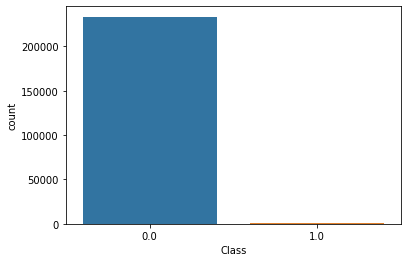

In [ ]:
sns.countplot(data=df, x='Class')
plt.show()

In [ ]:
fraud_percentage = {'CLass':['Non Fraud', 'Fraud'], 'percentage': [normal_share , Fraud_share]}
df_fraud_percentage= pd.DataFrame(fraud_percentage)
df_fraud_percentage

,CLass,percentage
0,Non Fraud,99.82
1,Fraud,0.18


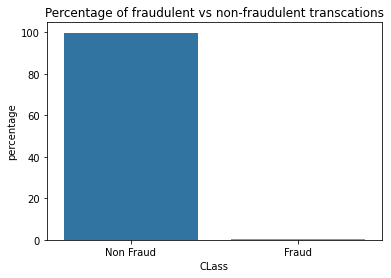

In [ ]:
sns.barplot(x='CLass', y='percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [ ]:
data_Fraud = df[df['Class'] == 1]
data_non_Fraud = df[df["Class"]==0]

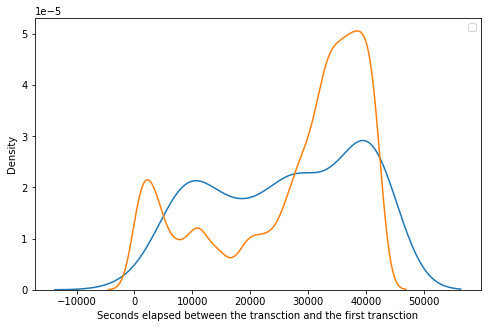

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_Fraud['Time'],label='fraudlent', hist=False)
ax = sns.distplot(data_non_Fraud['Time'],label='Non fraudlent', hist=False)
plt.legend('fraudlent', 'Non fraudlent')
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

**Observe the distribution of classes with amount**

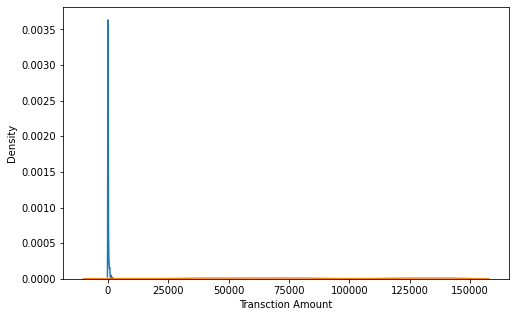

In [ ]:
 #Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_Fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_Fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

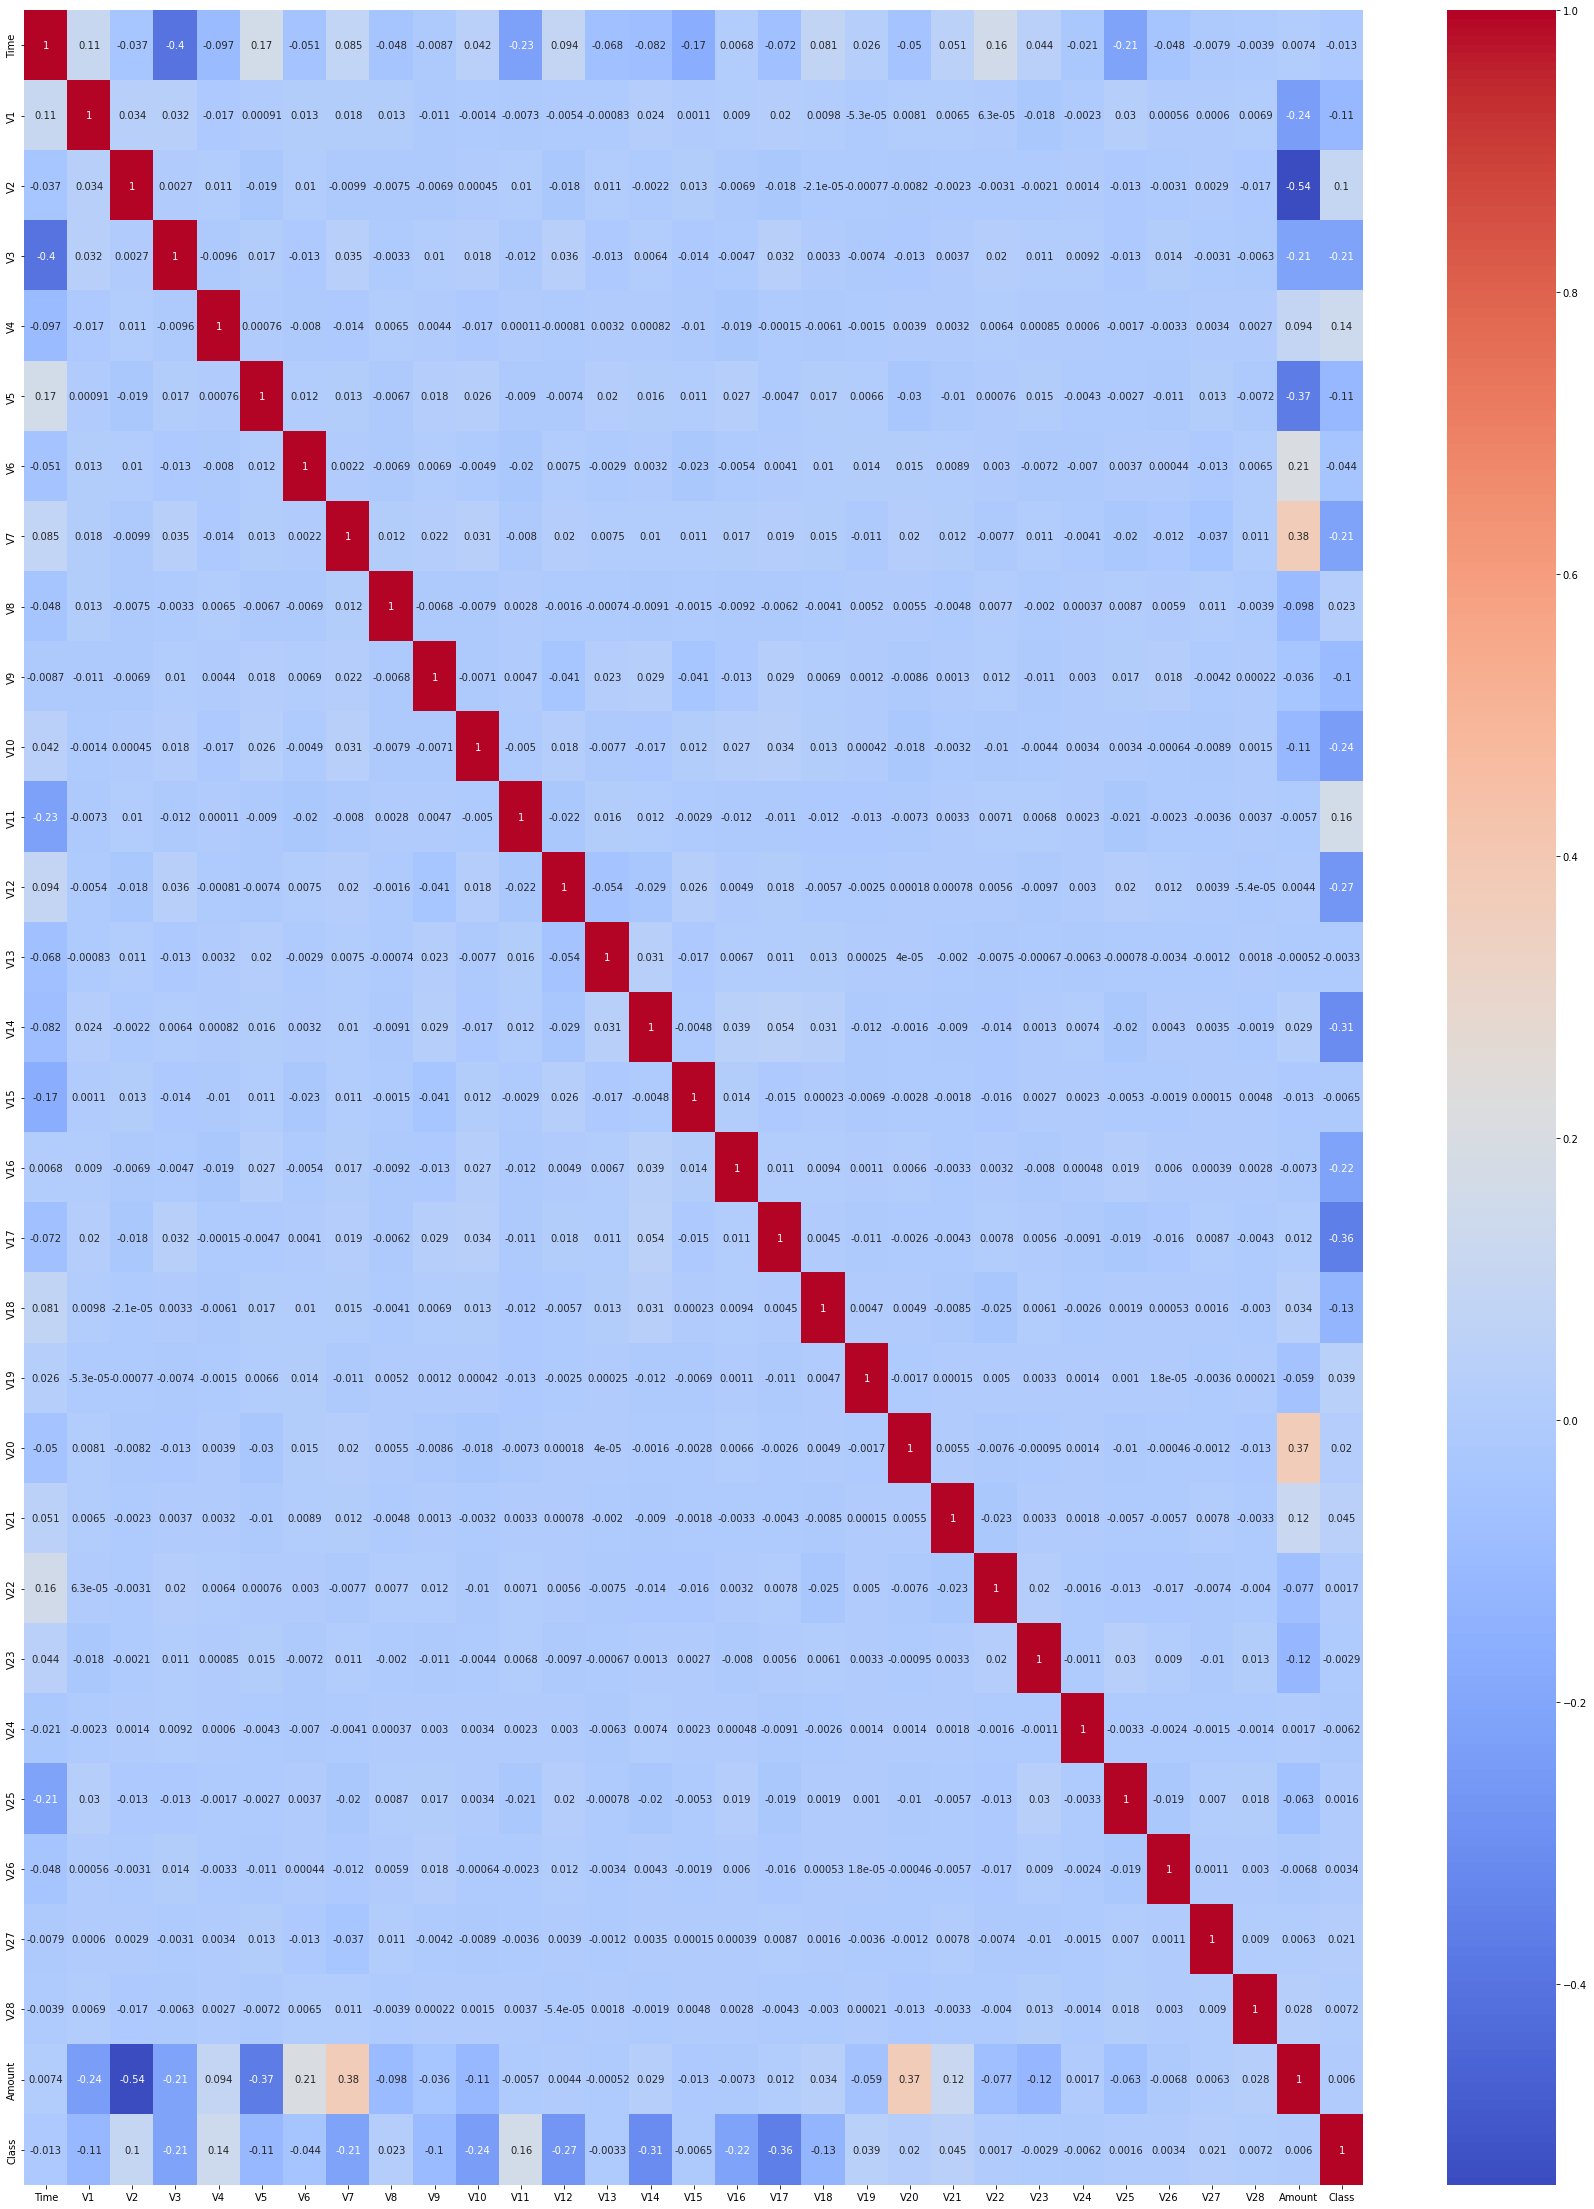

In [ ]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

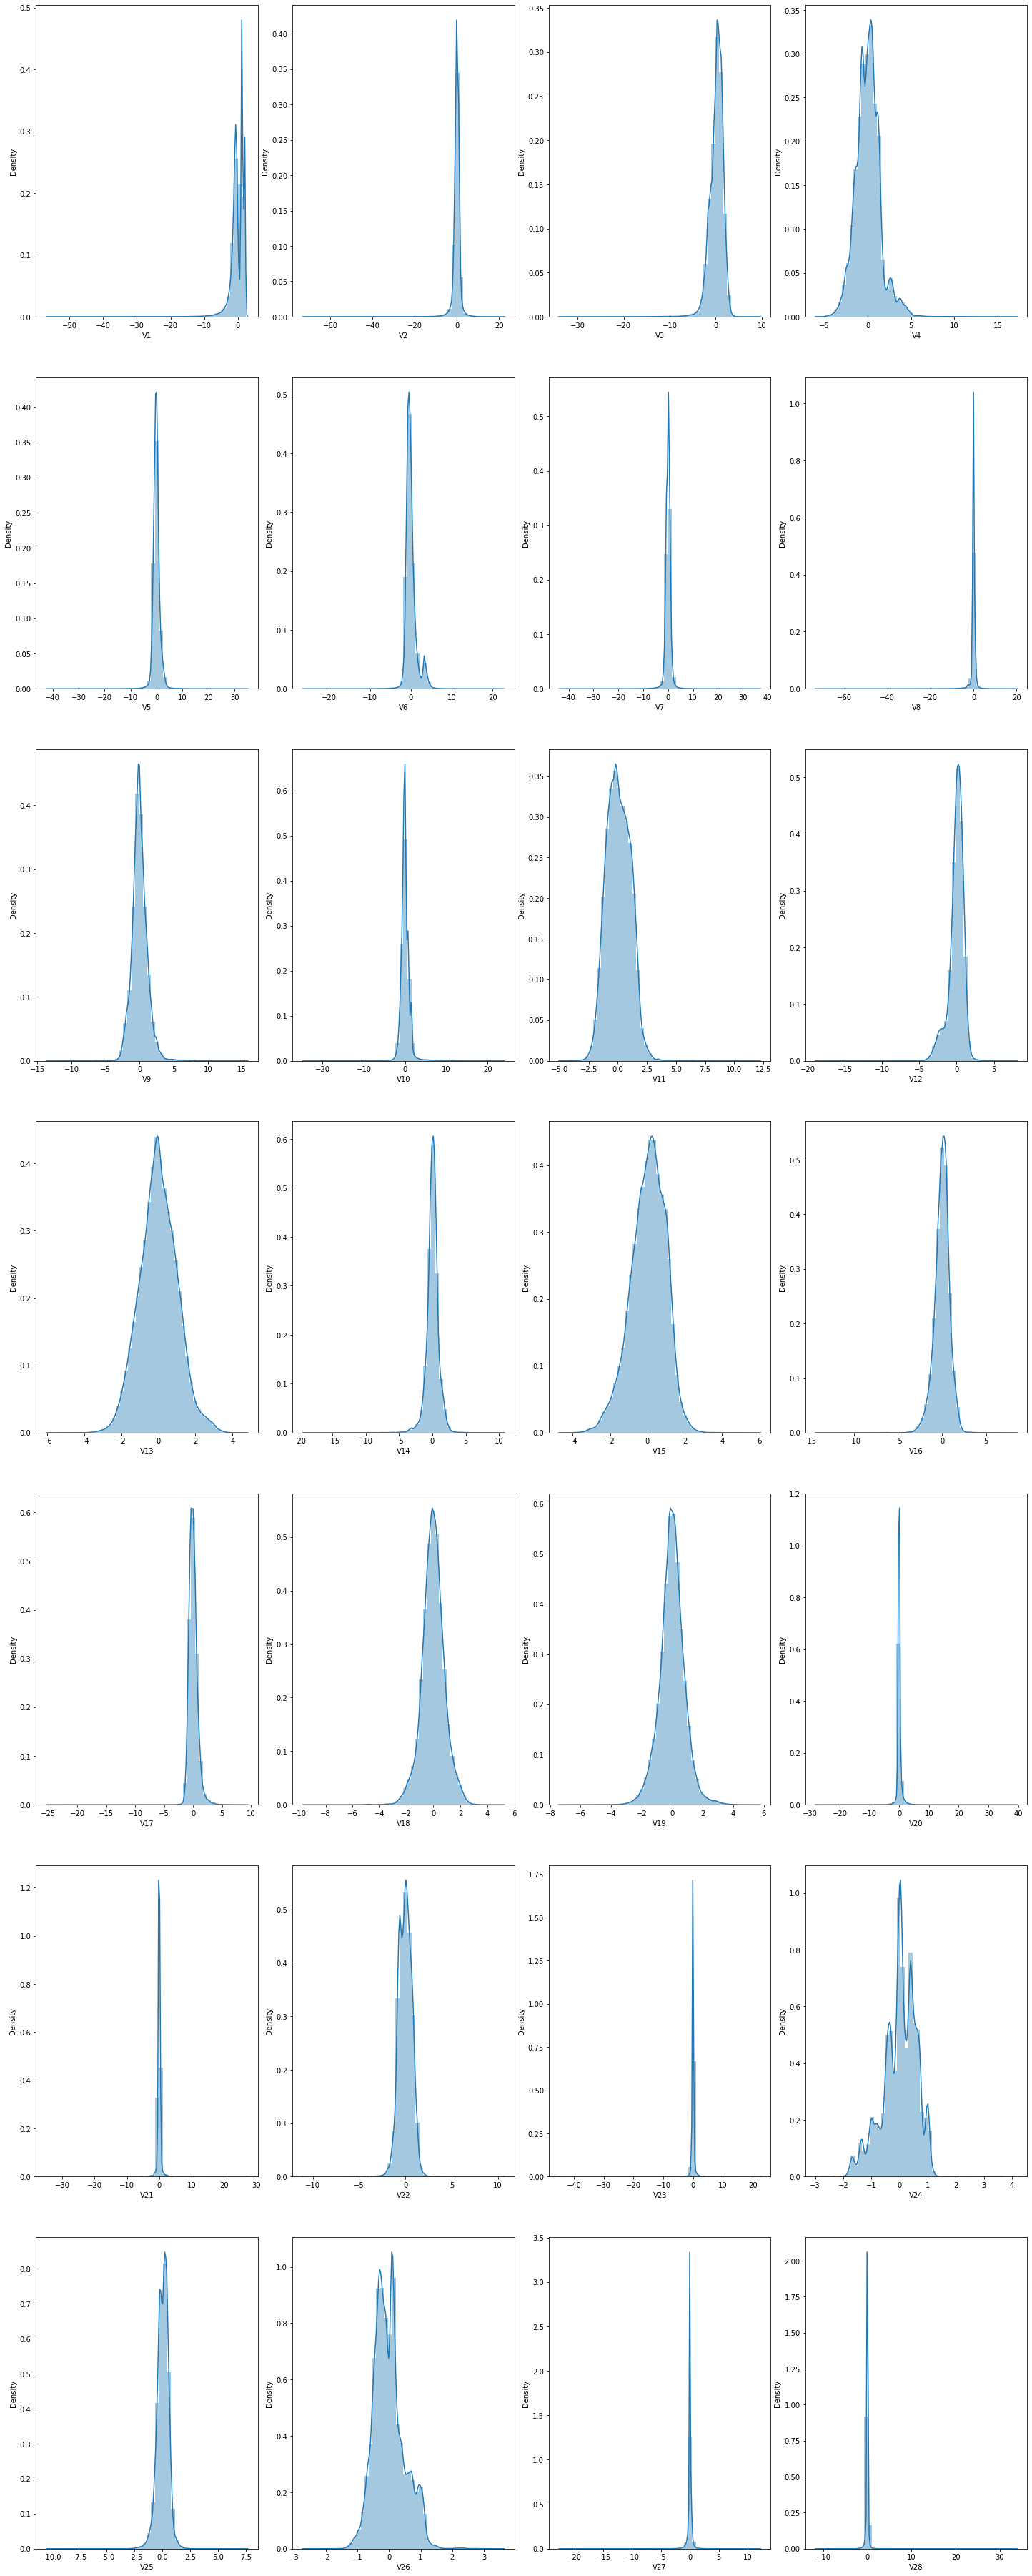

In [ ]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

#Train_Test_Split

In [ ]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

#Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)


In [ ]:
x_scaler

array([[-1.99798007, -0.6643519 , -0.03349602, ...,  0.33156335,
        -0.06787588,  0.23147232],
       [-1.99798007,  0.64032072,  0.16925547, ..., -0.02233468,
         0.03918331, -0.35001097],
       [-1.99795532, -0.66360894, -0.79165299, ..., -0.13746007,
        -0.18367751,  1.1379103 ],
       ...,
       [ 1.65639302, -0.20344196, -0.42929785, ...,  0.54396302,
         0.5667588 ,  0.83476172],
       [ 1.65641776,  1.09064742, -0.09158873, ..., -0.16945503,
        -0.16682919, -0.32108126],
       [ 1.65641776,  1.20844425, -0.82909372, ...,  0.04280255,
        -0.1548311 , -0.34086902]])

#Model Training

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split (x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58330
         1.0       0.83      0.66      0.74       106

    accuracy                           1.00     58436
   macro avg       0.92      0.83      0.87     58436
weighted avg       1.00      1.00      1.00     58436

F1 Score: 0.7368421052631579


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58330
         1.0       0.93      0.82      0.87       106

    accuracy                           1.00     58436
   macro avg       0.96      0.91      0.93     58436
weighted avg       1.00      1.00      1.00     58436

F1 Score: 0.8700000000000001


#Class Imbalancement

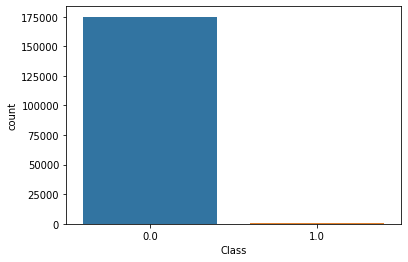

In [ ]:
sns.countplot(y_train)


In [ ]:
# hint - use combination of over sampling and under sampling
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

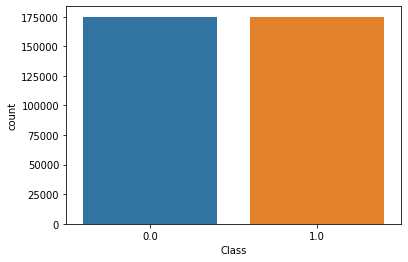

In [ ]:
sns.countplot(y_smote)

In [126]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     58330
         1.0       0.06      0.95      0.12       106

    accuracy                           0.97     58436
   macro avg       0.53      0.96      0.55     58436
weighted avg       1.00      0.97      0.99     58436

F1 Score: 0.11833626244874047


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

In [ ]:
F1 Score: 0.7924528301886793